# REQUIRED LIBRARIES TO INSTALL

In [ ]:
!pip install pandas numpy scikit-learn plotly matplotlib seaborn category-encoders dmba
!pip install pandas numpy plotly ipython

# A. IMPORT REQUIRED LIBRARIES

In [115]:
# System and Version Check
import sys
assert sys.version_info >= (3, 7)

# Path Management
from pathlib import Path

# Data Manipulation & Computation
import pandas as pd
import numpy as np

# Version Control For Libraries
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Data Imputation
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

# Data Encoding & Scaling
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from category_encoders import TargetEncoder

# Data Visualization
import plotly.graph_objects as go
import plotly.express as px
from pandas.plotting import parallel_coordinates
import matplotlib.pylab as plt
import seaborn as sns
from IPython.display import Image, display

# Other Utilities
import dmba

# Jupyter Notebook Settings
import dmba

# B. DATASET LOADING & PRE-PROCESSING

In [116]:
# Load and examine the dataset
edtech_df = pd.read_csv('QualityEducation.csv')
print("Shape of the dataset:", edtech_df.shape)

# Calculate the total number of rows in the DataFrame
total_rows = len(edtech_df)

# Evaluation of missing values
missing_counts = edtech_df.isnull().sum()

info_df = pd.DataFrame({
    'Column': edtech_df.columns,
    'NaN Count': missing_counts,
    '% of NaN': (missing_counts / total_rows) * 100
})

missing_values = info_df[info_df['NaN Count'] > 0]
print("Columns with missing values:")
print(missing_values)


Shape of the dataset: (260, 77)
Columns with missing values:
                                                              Column  \
C_EA_GT25_BA_EDUATTAIN_HSGH              C_EA_GT25_BA_EDUATTAIN_HSGH   
C_EA_GT25_BA_EDUATTAIN_BDH                C_EA_GT25_BA_EDUATTAIN_BDH   
C_EA_GT25_AIANA_EDUATTAIN_HSGH        C_EA_GT25_AIANA_EDUATTAIN_HSGH   
C_EA_GT25_AIANA_EDUATTAIN_BDH          C_EA_GT25_AIANA_EDUATTAIN_BDH   
C_EA_GT25_AA_EDUATTAIN_HSGH              C_EA_GT25_AA_EDUATTAIN_HSGH   
C_EA_GT25_AA_EDUATTAIN_BDH                C_EA_GT25_AA_EDUATTAIN_BDH   
C_EA_GT25_NHOPIA_EDUATTAIN_HSGH      C_EA_GT25_NHOPIA_EDUATTAIN_HSGH   
C_EA_GT25_NHOPIA_EDUATTAIN_BDH        C_EA_GT25_NHOPIA_EDUATTAIN_BDH   
C_EA_GT25_OA_EDUATTAIN_HSGH              C_EA_GT25_OA_EDUATTAIN_HSGH   
C_EA_GT25_OA_EDUATTAIN_BDH                C_EA_GT25_OA_EDUATTAIN_BDH   
C_EA_GT25_BA_M_EDUATTAIN_HSGH          C_EA_GT25_BA_M_EDUATTAIN_HSGH   
C_EA_GT25_BA_M_EDUATTAIN_BDH            C_EA_GT25_BA_M_EDUATTAIN_BDH   
C_E

## CITATION 

The book "Multiple Imputation of Missing Data in Practice: Basic Theory and Analysis Strategies" by Yulei He, Guangyu Zhang, and Chiu-Hsieh Hsu provides a comprehensive introduction to multiple imputation approaches for handling missing data. It discusses various strategies based on the extent of missingness:

Low Missingness (<5%): For columns with low missingness, simpler imputation methods like mean or median imputation are recommended. These methods are straightforward and work well when the missing data is minimal1.

Moderate Missingness (5%-15%): For columns with moderate missingness, more sophisticated methods like K-Nearest Neighbors (KNN) imputation are suggested. KNN imputation leverages relationships with other columns to estimate missing values1.

High Missingness (>50%): For columns with high missingness, the book advises caution. Imputing too much missing data can introduce bias, and in some cases, it might be better to remove these columns if they are not critical to the analysis1.


In [117]:
# Filter out columns that have no missing values
info_df_with_na = info_df[info_df['NaN Count'] > 0]

# Separate column names based on % of NaN
med_missing = info_df_with_na[info_df_with_na['% of NaN'] < 15].index.tolist()
high_missing = info_df_with_na[info_df_with_na['% of NaN'] >= 15].index.tolist()
print("\nColumns with < 15% missing values (med_missing):\n", med_missing)
print("\nColumns with >= 15% missing values (high_missing):\n", high_missing)


Columns with < 15% missing values (med_missing):
 ['C_EA_GT25_BA_EDUATTAIN_HSGH', 'C_EA_GT25_BA_EDUATTAIN_BDH', 'C_EA_GT25_AIANA_EDUATTAIN_HSGH', 'C_EA_GT25_AIANA_EDUATTAIN_BDH', 'C_EA_GT25_AA_EDUATTAIN_HSGH', 'C_EA_GT25_AA_EDUATTAIN_BDH', 'C_EA_GT25_OA_EDUATTAIN_HSGH', 'C_EA_GT25_OA_EDUATTAIN_BDH', 'C_EA_GT25_BA_M_EDUATTAIN_HSGH', 'C_EA_GT25_BA_M_EDUATTAIN_BDH', 'C_EA_GT25_AIANA_M_EDUATTAIN_HSGH', 'C_EA_GT25_AIANA_M_EDUATTAIN_BDH', 'C_EA_GT25_AA_M_EDUATTAIN_HSGH', 'C_EA_GT25_AA_M_EDUATTAIN_BDH', 'C_EA_GT25_OA_M_EDUATTAIN_HSGH', 'C_EA_GT25_OA_M_EDUATTAIN_BDH', 'C_EA_GT25_BA_F_EDUATTAIN_HSGH', 'C_EA_GT25_BA_F_EDUATTAIN_BDH', 'C_EA_GT25_AIANA_F_EDUATTAIN_HSGH', 'C_EA_GT25_AIANA_F_EDUATTAIN_BDH', 'C_EA_GT25_AA_F_EDUATTAIN_HSGH', 'C_EA_GT25_AA_F_EDUATTAIN_BDH', 'C_EA_GT25_OA_F_EDUATTAIN_HSGH', 'C_EA_GT25_OA_F_EDUATTAIN_BDH']

Columns with >= 15% missing values (high_missing):
 ['C_EA_GT25_NHOPIA_EDUATTAIN_HSGH', 'C_EA_GT25_NHOPIA_EDUATTAIN_BDH', 'C_EA_GT25_NHOPIA_M_EDUATTAIN_HSGH', 'C_EA_

In [118]:
# Drop columns in the high_missing list from the DataFrame
edtech2_df = edtech_df.drop(columns=high_missing)

# Verify the updated DataFrame
print("Columns dropped:", high_missing)
print("Updated DataFrame shape:", edtech2_df.shape)

Columns dropped: ['C_EA_GT25_NHOPIA_EDUATTAIN_HSGH', 'C_EA_GT25_NHOPIA_EDUATTAIN_BDH', 'C_EA_GT25_NHOPIA_M_EDUATTAIN_HSGH', 'C_EA_GT25_NHOPIA_M_EDUATTAIN_BDH', 'C_EA_GT25_NHOPIA_F_EDUATTAIN_HSGH', 'C_EA_GT25_NHOPIA_F_EDUATTAIN_BDH']
Updated DataFrame shape: (260, 71)


### KNN IMPUTATION FOR MISSING VALUES

In [120]:
# Subset the dataframe to only include the columns in med_missing
df_med_missing = edtech2_df[med_missing]

# Apply KNN Imputation for missing values
knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")
df_med_missing_imputed = knn_imputer.fit_transform(df_med_missing)
df_med_missing_imputed = pd.DataFrame(df_med_missing_imputed, columns=med_missing)

# Replace the original columns in the dataset with the imputed columns
edtech2_df.update(df_med_missing_imputed)

# Save the imputed dataset
edtech2_df.to_csv('imputed_dataset_1.csv', index=False)

print("KNN Imputation applied successfully!")

KNN Imputation applied successfully!


In [121]:
# Removing records where GeoName is "United States" or "District of Columbia" as these are not States
edtech2_df = edtech2_df[~edtech2_df['GeoName'].isin(['United States', 'District of Columbia'])]

### CHECKING PRESENCE OF NAN POST-IMPUTATION

In [122]:
# Determining Missing Values
pd.set_option('display.max_columns', None)
nan_counts2 = edtech2_df.isna().sum()
data_types2 = edtech2_df.dtypes
info_df2 = pd.DataFrame({'Data Type': data_types2, 'NaN Count': nan_counts2})

# Filter to show only columns with NaNs
info_df2_with_nan = info_df2[info_df2['NaN Count'] > 0]
print(info_df2_with_nan)

Empty DataFrame
Columns: [Data Type, NaN Count]
Index: []


In [123]:
np.round(edtech2_df.describe(), decimals=2)

,OBJECTID,Reporting_Year,C_SR_POP_SCHOOL_AGE_Y3T4,C_SR_POP_SCHOOL_AGE_Y5T9,C_SR_POP_SCHOOL_AGE_Y10T14,C_SR_POP_SCHOOL_AGE_Y15T17,C_SR_POP_SCHOOL_AGE_Y18T19,C_SR_POP_SCHOOL_AGE_Y20T24,C_SR_POP_SCHOOL_AGE_Y25T34,C_SR_POP_SCHOOL_AGE_YGE35,C_SR_POP_COLGS_AGE_Y18T24,C_SR_POP_COLGS_M_AGE_Y18T24,C_SR_POP_COLGS_F_AGE_Y18T24,C_EA_GT25_WA_EDUATTAIN_HSG,C_EA_GT25_WA_EDUATTAIN_BDH,C_EA_GT25_WANHL_EDUATTAIN_HSGH,C_EA_GT25_WANHL_EDUATTAIN_BDH,C_EA_GT25_BA_EDUATTAIN_HSGH,C_EA_GT25_BA_EDUATTAIN_BDH,C_EA_GT25_AIANA_EDUATTAIN_HSGH,C_EA_GT25_AIANA_EDUATTAIN_BDH,C_EA_GT25_AA_EDUATTAIN_HSGH,C_EA_GT25_AA_EDUATTAIN_BDH,C_EA_GT25_OA_EDUATTAIN_HSGH,C_EA_GT25_OA_EDUATTAIN_BDH,C_EA_GT25_TOM_EDUATTAIN_HSGH,C_EA_GT25_TOM_EDUATTAIN_BDH,C_EA_GT25_HOLO_EDUATTAIN_HSGH,C_EA_GT25_HOLO_EDUATTAIN_BDH,C_EA_GT25_WA_M_EDUATTAIN_BDH,C_EA_GT25_WANHL_M_EDUATTAIN_HSGH,C_EA_GT25_WANHL_M_EDUATTAIN_BDH,C_EA_GT25_BA_M_EDUATTAIN_HSGH,C_EA_GT25_BA_M_EDUATTAIN_BDH,C_EA_GT25_AIANA_M_EDUATTAIN_HSGH,C_EA_GT25_AIANA_M_EDUATTAIN_BDH,C_EA_GT25_AA_M_EDUATTAIN_HSGH,C_EA_GT25_AA_M_EDUATTAIN_BDH,C_EA_GT25_OA_M_EDUATTAIN_HSGH,C_EA_GT25_OA_M_EDUATTAIN_BDH,C_EA_GT25_TOM_M_EDUATTAIN_HSGH,C_EA_GT25_TOM_M_EDUATTAIN_BDH,C_EA_GT25_HOLO_M_EDUATTAIN_HSGH,C_EA_GT25_HOLO_M_EDUATTAIN_BDH,C_EA_GT25_WA_F_EDUATTAIN_BDH,C_EA_GT25_WANHL_F_EDUATTAIN_HSGH,C_EA_GT25_WANHL_F_EDUATTAIN_BDH,C_EA_GT25_BA_F_EDUATTAIN_HSGH,C_EA_GT25_BA_F_EDUATTAIN_BDH,C_EA_GT25_AIANA_F_EDUATTAIN_HSGH,C_EA_GT25_AIANA_F_EDUATTAIN_BDH,C_EA_GT25_AA_F_EDUATTAIN_HSGH,C_EA_GT25_AA_F_EDUATTAIN_BDH,C_EA_GT25_OA_F_EDUATTAIN_HSGH,C_EA_GT25_OA_F_EDUATTAIN_BDH,C_EA_GT25_TOM_F_EDUATTAIN_HSGH,C_EA_GT25_TOM_F_EDUATTAIN_BDH,C_EA_GT25_HOLO_F_EDUATTAIN_HSGH,C_EA_GT25_HOLO_F_EDUATTAIN_BDH,C_EA_GT25_WDIS_EDUATTAIN_LHSG,C_EA_GT25_WDIS_EDUATTAIN_HSGIE,C_EA_GT25_WDIS_EDUATTAIN_SCAG,C_EA_GT25_WDIS_EDUATTAIN_BDH,C_EA_GT25_WODIS_EDUATTAIN_LHSG,C_EA_GT25_WODIS_EDUATTAIN_HSGIE,C_EA_GT25_WODIS_EDUATTAIN_SCAG,C_EA_GT25_WODIS_EDUATTAIN_BDH,C_EA_GT25_WA_M_EDUATTAIN_HSG,C_EA_GT25_WA_F_EDUATTAIN_HSG
count,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.0,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00
mean,133.10,2017.00,46.14,94.44,97.64,96.14,73.46,39.34,10.91,1.95,40.70,36.56,45.10,90.52,32.28,92.34,33.92,86.24,21.37,80.12,15.95,85.94,51.70,63.96,12.95,88.1,29.11,70.38,16.97,31.60,91.75,33.39,85.72,19.48,78.29,14.34,87.71,55.30,62.43,11.46,87.08,26.98,68.56,15.24,32.98,92.97,34.44,86.50,23.17,81.82,17.52,84.46,48.76,65.61,14.76,89.06,31.14,72.39,18.86,18.42,34.64,28.36,16.77,8.07,26.37,29.92,33.84,90.24,91.72
std,74.65,1.42,7.48,1.42,0.56,1.02,5.91,4.92,1.50,0.52,5.46,5.49,5.65,2.77,5.67,2.51,6.39,4.23,5.74,6.09,5.85,4.74,9.45,9.92,6.26,3.7,5.91,8.40,5.84,5.74,2.76,6.62,4.82,6.83,7.68,6.52,5.54,11.25,10.93,6.57,4.71,6.09,9.11,5.74,5.79,2.33,6.35,5.68,7.38,6.46,7.43,4.91,8.81,9.95,7.91,3.94,6.59,7.96,6.58,4.26,3.97,4.14,3.28,2.46,3.87,3.51,5.30,2.91,2.69
min,1.00,2015.00,28.00,89.00,96.00,92.00,53.00,20.00,8.00,1.00,21.00,18.00,25.00,82.00,19.00,85.00,19.00,67.00,9.00,52.00,1.00,64.00,24.00,43.00,3.00,65.0,13.00,54.00,8.00,18.00,84.00,18.00,69.00,7.00,35.00,0.00,51.00,18.00,36.00,1.00,59.00,9.00,51.00,7.00,19.00,86.00,19.00,53.00,6.00,56.00,0.00,68.00,26.00,27.00,3.00,71.00,15.00,56.00,8.00,8.00,24.00,19.00,9.00,4.00,19.00,22.00,23.00,82.00,83.40
25%,68.25,2016.00,42.00,94.00,97.00,96.00,70.00,36.00,10.00,2.00,37.00,33.00,42.00,89.00,28.00,91.00,29.00,84.00,17.00,76.25,12.00,84.00,45.00,57.00,10.00,86.0,25.00,64.00,13.00,28.00,90.00,28.00,83.00,15.00,74.00,10.00,85.00,49.00,55.00,8.00,85.00,23.00,62.00,12.00,29.00,91.25,30.00,84.00,19.00,78.00,12.00,82.00,43.00,59.00,11.00,87.00,27.00,

### FOR REFERENCE

WA: White Americans

WANHL: White, Non-Hispanic/Latino

AIANA: American Indian/Alaska Native

AA: African American

OA: Other Asian

TOM: Totals or unknown groups

HOLO: Hawaiian or Other Pacific Islander

# C. DATA VISUALIZATION & ANALYSIS

## 1. TRENDS IN AGE-LEVEL SCHOOL ENROLLMENT PROPORTIONS BY REPORTING YEAR (2015-2019)

In [124]:
# Define age-level enrollment columns
age_enrollment_cols = [
    'C_SR_POP_SCHOOL_AGE_Y3T4', 
    'C_SR_POP_SCHOOL_AGE_Y5T9', 
    'C_SR_POP_SCHOOL_AGE_Y10T14', 
    'C_SR_POP_SCHOOL_AGE_Y15T17', 
    'C_SR_POP_SCHOOL_AGE_Y18T19', 
    'C_SR_POP_SCHOOL_AGE_Y20T24', 
    'C_SR_POP_SCHOOL_AGE_Y25T34', 
    'C_SR_POP_SCHOOL_AGE_YGE35'
]

# Calculate mean proportion for each year
aggregated_data = edtech2_df.groupby('Reporting_Year')[age_enrollment_cols].mean()

# Create the interactive bar chart
fig = go.Figure()

for col in age_enrollment_cols:
    fig.add_trace(
        go.Bar(
            x=aggregated_data.index,
            y=aggregated_data[col],
            name=col,
            hovertemplate="<b>Age Group:</b> %{customdata}<br><b>Mean Enrollment Proportion:</b> %{y:.2f}<br><b>Year:</b> %{x}<extra></extra>",
            customdata=[col] * len(aggregated_data.index),  
        )
    )

# Customize layout
fig.update_layout(
    title="Trends in Age-Level School Enrollment Proportions by Reporting Year (2015-2019)",
    xaxis_title="Reporting Year",
    yaxis_title="Mean Enrollment Proportion",
    barmode='group',  
    legend_title="Age Groups",
    template="plotly_white"
)

# Display the chart
fig.show()


In [125]:
fig.write_html("1_Trends in Age-Level School Enrollment Proportions by Reporting Year (2015-2019).html")

## INFERENCE

Enrollment proportions are consistently high for younger age groups (ages 5-9, 10-14, and 15-17) across all reporting years, they drop significantly for older age groups (ages 18 to 34 and 35+).

## 2. TRENDS IN PRIMARY (AGES 3-9) vs. SECONDARY (AGES 15-17) ENROLLMENT PROPORTION BY YEAR

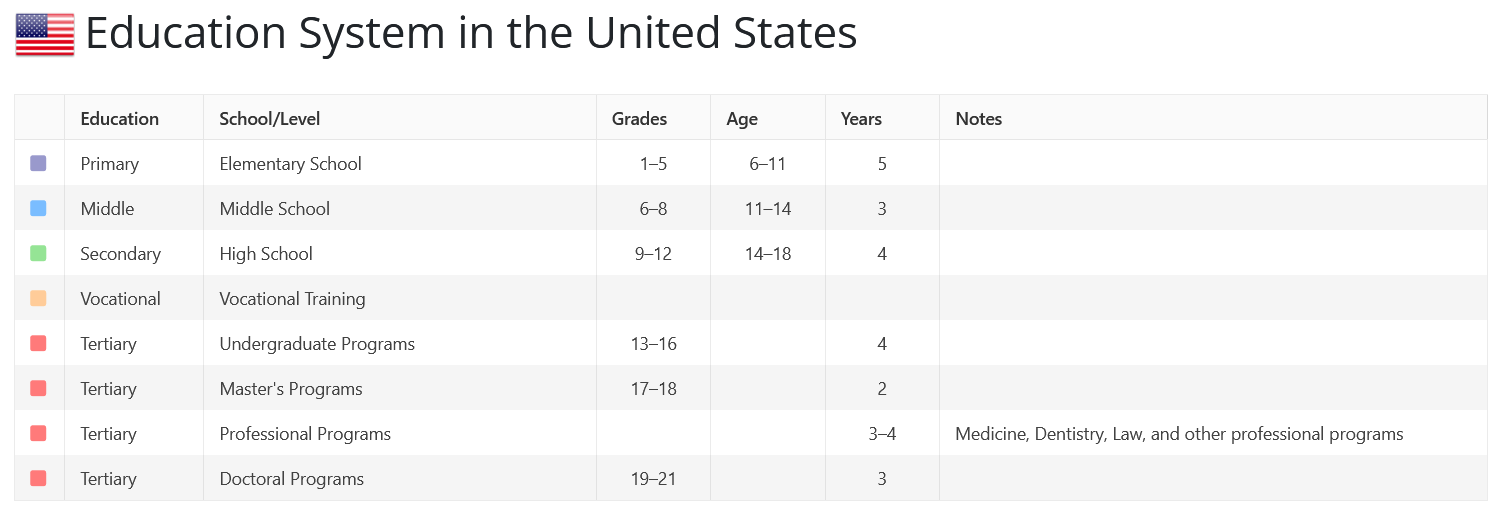

In [126]:
# Citation - Education System in the United States
image_path = "Primary_Secondary_Education.png"
display(Image(filename=image_path))

## CITATION

https://www.scholaro.com/db/Countries/united-states/Education-System


In [127]:
# Define the age group columns for primary and secondary
primary_age_groups = ['C_SR_POP_SCHOOL_AGE_Y3T4', 'C_SR_POP_SCHOOL_AGE_Y5T9']
secondary_age_groups = ['C_SR_POP_SCHOOL_AGE_Y15T17']

aggregated_data = edtech2_df.groupby('Reporting_Year')[primary_age_groups + secondary_age_groups].mean()
aggregated_data['Primary_Mean'] = aggregated_data[primary_age_groups].sum(axis=1) / 2

# Create the interactive bar chart
fig = go.Figure()

# Add primary age group trace (mean of the two primary age group columns)
fig.add_trace(
    go.Bar(
        x=aggregated_data.index,
        y=aggregated_data['Primary_Mean'], 
        name='Primary (Ages 3-9)',
        hovertemplate="<b>Age Group:</b> Primary (Ages 3-9)<br><b>Mean Enrollment Proportion:</b> %{y:.2f}<br><b>Year:</b> %{x}<extra></extra>"
    )
)

# Add secondary age group trace
fig.add_trace(
    go.Bar(
        x=aggregated_data.index,
        y=aggregated_data[secondary_age_groups].sum(axis=1),  
        name='Secondary (Ages 15-17)',
        hovertemplate="<b>Age Group:</b> Secondary (Ages 15-17)<br><b>Mean Enrollment Proportion:</b> %{y:.2f}<br><b>Year:</b> %{x}<extra></extra>"
    )
)

# Customize layout
fig.update_layout(
    title="Trends in Primary (Ages 3-9) vs. Secondary (Ages 15-17) Enrollment Proportion by Year",
    xaxis_title="Reporting Year",
    yaxis_title="Mean Enrollment Proportion",
    barmode='group',  
    legend_title="Age Groups",
    template="plotly_white"
)

fig.show()


In [128]:
fig.write_html("2_Trends in Primary (Ages 3-9) vs. Secondary (Ages 15-17) Enrollment Proportion by Year.html")

## INFERENCES

1. The mean enrollment proportion for primary education shows a steady increase from 69.65 in 2015 to 70.66 in 2019.
2. The mean enrollment proportion for secondary education remains relatively stable, with slight fluctuations around 96.00 from 2015 to 2019.

## 3. COMPARISON OF PRIMARY  AND SECONDARY  EDUCATION ENROLLMENT PROPORTIONS ACROSS STATES

In [131]:
# Define the age group columns for primary and secondary
primary_age_groups = ['C_SR_POP_SCHOOL_AGE_Y3T4', 'C_SR_POP_SCHOOL_AGE_Y5T9']
secondary_age_groups = ['C_SR_POP_SCHOOL_AGE_Y15T17']

aggregated_by_geoname = edtech2_df.groupby('GeoName')[primary_age_groups + secondary_age_groups].mean()
aggregated_by_geoname['Primary_Mean'] = aggregated_by_geoname[primary_age_groups].sum(axis=1) / 2

# Create the interactive bar chart
fig = go.Figure()

# Add primary age group trace (mean of the two primary age group columns)
fig.add_trace(
    go.Bar(
        x=aggregated_by_geoname.index,  # Use GeoName as the x-axis
        y=aggregated_by_geoname['Primary_Mean'],  # Use the calculated mean for primary
        name='Primary (Ages 3-9)',
        hovertemplate="<b>Age Group:</b> Primary (Ages 3-9)<br><b>Mean Enrollment Proportion:</b> %{y:.2f}<br><b>GeoName:</b> %{x}<extra></extra>"
    )
)

# Add secondary age group trace
fig.add_trace(
    go.Bar(
        x=aggregated_by_geoname.index,  # Use GeoName as the x-axis
        y=aggregated_by_geoname[secondary_age_groups].sum(axis=1),  # Sum secondary age group columns
        name='Secondary (Ages 15-17)',
        hovertemplate="<b>Age Group:</b> Secondary (Ages 15-17)<br><b>Mean Enrollment Proportion:</b> %{y:.2f}<br><b>GeoName:</b> %{x}<extra></extra>"
    )
)

# Customize layout
fig.update_layout(
    title="Comparison of Primary and Secondary Education Enrollment Proportions Across States",
    xaxis_title="GeoName",
    yaxis_title="Mean Enrollment Proportion",
    barmode='group',  # Group bars by GeoName
    legend_title="Age Groups",
    template="plotly_white"
)

fig.show()


In [132]:
fig.write_html("3_Comparison of Primary and Secondary Enrollment Proportions Across States.html")

## INFERENCES

### Primary Education:

High Enrollment Rates: States like Connecticut (81.0), New Jersey (80.3), New York (77.4) and Massachusetts (77.3) have notably high primary education enrollment rates.

Lower Enrollment Rates: States such as North Dakota (61.2), Idaho (63.0), and Virginia (63.8) have lower primary education enrollment rates compared to others.


### Secondary Education:

Stable Enrollment Rates: Most states show secondary education enrollment rates around the mid-90 s, with minimal variation.

High Enrollment States: States like Massachusetts (97.4), Connecticut (97.4), Nebraska (97.2), and Virginia (97.2) have higher secondary education enrollment rates.

Lower Enrollment States: States like Hawaii (94.8), New Mexico (94.6), and Montana (94.2) are on the lower side for secondary enrollment.

## DETERMINATION OF STATES WITH HIGHEST & LOWEST PRIMARY/ SECONDARY EDUCATION ENROLLMENT 

In [22]:
# Calculate the mean of primary education proportions for each state (GeoName)
aggregated_by_geoname['Primary (Ages 3-9)'] = aggregated_by_geoname[primary_age_groups].sum(axis=1) / 2

# Sum the secondary education proportions
aggregated_by_geoname['Secondary (Ages 15-17)'] = aggregated_by_geoname[secondary_age_groups].sum(axis=1)

# Find the states with the highest and lowest primary education enrollment
highest_primary_state = aggregated_by_geoname['Primary (Ages 3-9)'].idxmax()
lowest_primary_state = aggregated_by_geoname['Primary (Ages 3-9)'].idxmin()

# Find the states with the highest and lowest secondary education enrollment
highest_secondary_state = aggregated_by_geoname['Secondary (Ages 15-17)'].idxmax()
lowest_secondary_state = aggregated_by_geoname['Secondary (Ages 15-17)'].idxmin()

# Get the values for the highest and lowest states
highest_primary_value = aggregated_by_geoname.loc[highest_primary_state, 'Primary (Ages 3-9)']
lowest_primary_value = aggregated_by_geoname.loc[lowest_primary_state, 'Primary (Ages 3-9)']

highest_secondary_value = aggregated_by_geoname.loc[highest_secondary_state, 'Secondary (Ages 15-17)']
lowest_secondary_value = aggregated_by_geoname.loc[lowest_secondary_state, 'Secondary (Ages 15-17)']

# Calculate percentage differences
primary_percentage_diff = ((highest_primary_value - lowest_primary_value) / lowest_primary_value) * 100
secondary_percentage_diff = ((highest_secondary_value - lowest_secondary_value) / lowest_secondary_value) * 100

# Print results
print(f"State with the highest primary education enrollment: {highest_primary_state} ({highest_primary_value:.2f})")
print(f"State with the lowest primary education enrollment: {lowest_primary_state} ({lowest_primary_value:.2f})")
print(f"Percentage difference in primary education enrollment: {primary_percentage_diff:.2f}%\n")

print(f"State with the highest secondary education enrollment: {highest_secondary_state} ({highest_secondary_value:.2f})")
print(f"State with the lowest secondary education enrollment: {lowest_secondary_state} ({lowest_secondary_value:.2f})")
print(f"Percentage difference in secondary education enrollment: {secondary_percentage_diff:.2f}%")


State with the highest primary education enrollment: Connecticut (81.00)
State with the lowest primary education enrollment: North Dakota (61.20)
Percentage difference in primary education enrollment: 32.35%

State with the highest secondary education enrollment: Connecticut (97.40)
State with the lowest secondary education enrollment: Montana (94.20)
Percentage difference in secondary education enrollment: 3.40%


## 4. COMPARISON OF STATE-LEVEL EDUCATION ENROLLMENT PROPORTIONS FOR ALL YEARS

In [134]:
# Mapping of state names to abbreviations
us_state_to_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Filter out non-state entries like 'United States' and 'District of Columbia'
edtech2_df = edtech2_df[edtech2_df['GeoName'].isin(us_state_to_abbrev.keys())]

# Define primary and secondary age group columns
primary_age_groups = ['C_SR_POP_SCHOOL_AGE_Y3T4', 'C_SR_POP_SCHOOL_AGE_Y5T9']
secondary_age_groups = ['C_SR_POP_SCHOOL_AGE_Y15T17']

# Group by GeoName and Reporting Year, and calculate mean proportions for primary and secondary groups
aggregated_by_year_geoname = edtech3_df.groupby(['GeoName', 'Reporting_Year'])[primary_age_groups + secondary_age_groups].mean().reset_index()

# Calculate the mean for primary age groups and the sum for secondary
aggregated_by_year_geoname['Primary (Ages 3-9)'] = aggregated_by_year_geoname[primary_age_groups].sum(axis=1) / 2
aggregated_by_year_geoname['Secondary (Ages 15-17)'] = aggregated_by_year_geoname[secondary_age_groups].sum(axis=1)

# Map full state names to state abbreviations
aggregated_by_year_geoname['State Abbrev'] = aggregated_by_year_geoname['GeoName'].map(us_state_to_abbrev)

# Function to create a choropleth map with dropdowns for year selection
def create_choropleth_map(data, age_group_column, title, colorbar_title, zmin, zmax):
    fig = go.Figure()

    # Create choropleth traces for each year
    for year in data['Reporting_Year'].unique():
        yearly_data = data[data['Reporting_Year'] == year]
        fig.add_trace(go.Choropleth(
            locations=yearly_data['State Abbrev'],
            z=yearly_data[age_group_column],
            locationmode="USA-states",
            colorscale="Plasma",
            colorbar_title=colorbar_title,
            zmin=zmin,  
            zmax=zmax,  
            text=yearly_data['GeoName'],  
            hovertemplate="<b>State:</b> %{text}<br><b>Enrollment:</b> %{z}<extra></extra>",  
            visible=False,
            name=str(year)
        ))

    # Add an option for all years combined
    combined_data = data.groupby(['GeoName', 'State Abbrev'])[age_group_column].mean().reset_index()
    fig.add_trace(go.Choropleth(
        locations=combined_data['State Abbrev'],
        z=combined_data[age_group_column],
        locationmode="USA-states",
        colorscale="Plasma",
        colorbar_title=colorbar_title,
        zmin=zmin,  
        zmax=zmax,  
        text=combined_data['GeoName'],  
        hovertemplate="<b>State:</b> %{text}<br><b>Enrollment:</b> %{z}<extra></extra>", 
        visible=True,
        name='All Years'
    ))

    # Create dropdown menu for year selection
    year_buttons = [
        {
            'label': 'All Years',
            'method': 'update',
            'args': [{'visible': [trace.name == 'All Years' for trace in fig.data]},
                     {'title': f'{title} (All Years)'}]
        }
    ]

    year_buttons += [
        {
            'label': str(year),
            'method': 'update',
            'args': [{'visible': [trace.name == str(year) for trace in fig.data]},
                     {'title': f'{title} ({year})'}]
        }
        for year in data['Reporting_Year'].unique()
    ]

    fig.update_layout(
        title=title,
        geo=dict(
            scope='usa',
            projection_type='albers usa',
            showland=True,
            landcolor="white",
            subunitcolor="gray"
        ),
        updatemenus=[
            {
                'buttons': year_buttons,
                'direction': 'down',
                'showactive': True,
                'x': 0.87,
                'xanchor': 'left',
                'y': 1.25,
                'yanchor': 'top'
            }
        ]
    )

    return fig

# Create the choropleth map for primary education enrollment (fixed color scale from 65 to 85)
fig_primary = create_choropleth_map(aggregated_by_year_geoname, 'Primary (Ages 3-9)', 
                                    "Trends in Primary Education Enrollment Proportions by State and Year", 
                                    "Primary Enrollment", 60, 82)

# Create the choropleth map for secondary education enrollment (fixed color scale from 94 to 98)
fig_secondary = create_choropleth_map(aggregated_by_year_geoname, 'Secondary (Ages 15-17)', 
                                      "Trends in Secondary Education Enrollment Proportions by State and Year", 
                                      "Secondary Enrollment", 94, 98)

fig_primary.show()
fig_secondary.show()


In [135]:
fig_primary.write_html("4a_Trends in Primary Education Enrollment Proportions by State and Year.html")
fig_secondary.write_html("4b_Trends in Secondary Education Enrollment Proportions by State and Year.html")

## 5. EDUCATIONAL ATTAINMENT DISPARITIES BY RACE OVER THE YEARS

In [136]:
# Ensure that the Reporting_Year is numeric
edtech2_df['Reporting_Year'] = pd.to_numeric(edtech2_df['Reporting_Year'], errors='coerce')

# Create new columns for each race (by averaging the two columns for each group)
edtech2_df['WHITES'] = (edtech2_df['C_EA_GT25_WA_EDUATTAIN_HSG'] + edtech2_df['C_EA_GT25_WA_EDUATTAIN_BDH']) / 2
edtech2_df['WHITES_NOT_HISPANIC_LATINO'] = (edtech2_df['C_EA_GT25_WANHL_EDUATTAIN_HSGH'] + edtech2_df['C_EA_GT25_WANHL_EDUATTAIN_BDH']) / 2
edtech2_df['BLACKS'] = (edtech2_df['C_EA_GT25_BA_EDUATTAIN_HSGH'] + edtech2_df['C_EA_GT25_BA_EDUATTAIN_BDH']) / 2
edtech2_df['AMERICANINDIAN_ALASKANATIVE'] = (edtech2_df['C_EA_GT25_AIANA_EDUATTAIN_HSGH'] + edtech2_df['C_EA_GT25_AIANA_EDUATTAIN_BDH']) / 2
edtech2_df['ASIANS'] = (edtech2_df['C_EA_GT25_AA_EDUATTAIN_HSGH'] + edtech2_df['C_EA_GT25_AA_EDUATTAIN_BDH']) / 2
edtech2_df['OTHERS'] = (edtech2_df['C_EA_GT25_OA_EDUATTAIN_HSGH'] + edtech2_df['C_EA_GT25_OA_EDUATTAIN_BDH']) / 2
edtech2_df['TWO_OR_MORE_RACES'] = (edtech2_df['C_EA_GT25_TOM_EDUATTAIN_HSGH'] + edtech2_df['C_EA_GT25_TOM_EDUATTAIN_BDH']) / 2
edtech2_df['HISPANIC_OR_LATINO_ORIGIN'] = (edtech2_df['C_EA_GT25_HOLO_EDUATTAIN_HSGH'] + edtech2_df['C_EA_GT25_HOLO_EDUATTAIN_BDH']) / 2

numeric_columns = [
    'WHITES', 'WHITES_NOT_HISPANIC_LATINO', 'BLACKS', 'AMERICANINDIAN_ALASKANATIVE', 
    'ASIANS', 'OTHERS', 'TWO_OR_MORE_RACES', 'HISPANIC_OR_LATINO_ORIGIN'
]
edtech2_df[numeric_columns] = edtech2_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Group by Reporting Year and calculate the mean for each race group (if there are multiple years)
mean_eduattain_per_year = edtech2_df.groupby('Reporting_Year')[numeric_columns].mean()

# Reset index to prepare for Plotly
mean_eduattain_per_year = mean_eduattain_per_year.reset_index()

# Melt the DataFrame to long format for Plotly compatibility
long_format_data = mean_eduattain_per_year.melt(
    id_vars='Reporting_Year',
    var_name='Race',
    value_name='Mean Educational Attainment'
)

# Create the interactive line graph using Plotly Express
fig = px.line(
    long_format_data,
    x='Reporting_Year',
    y='Mean Educational Attainment',
    color='Race',
    title='Educational Attainment Disparities by Race Over the Years',
    labels={'Reporting_Year': 'Reporting Year', 'Mean Educational Attainment': 'Educational Attainment'}
)

# Update layout for better visualization
fig.update_layout(
    hovermode='x unified',
    legend_title_text='Race',
    xaxis_title='Reporting Year',
    yaxis_title='Mean Educational Attainment',
    template='plotly_white'
)

fig.show()


C:\Users\STSC\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [137]:
fig.write_html("5_Educational Attainment Disparities by Race Over the Years.html")

## INFERENCES

Asian Alone group consistently achieves high educational attainment levels across the years.

American Indian/Alaska Native (AIANA) and Hispanic or Latin Origin (HOLO) groups often show lower educational attainment, highlighting persistent educational inequities.

There are significant disparities in educational attainment among different racial groups, indicating systemic inequality.

## 6. EDUCATION ATTAINMENT TRENDS BY RACE AND YEAR ACROSS U.S. STATES

In [142]:
# List of race column names after averaging
race_names = [
    'WHITES', 'WHITES_NOT_HISPANIC_LATINO', 'BLACKS', 'AMERICANINDIAN_ALASKANATIVE', 
    'ASIANS', 'OTHERS', 'TWO_OR_MORE_RACES', 'HISPANIC_OR_LATINO_ORIGIN'
]

combined_race_data = pd.DataFrame()

# Calculate the mean for each race group (as done before)
for race in race_names:
    combined_race_data[f'{race}_mean'] = edtech2_df[race]

# Map full state names to state abbreviations
combined_race_data['State Abbrev'] = edtech2_df['GeoName'].map(us_state_to_abbrev)
combined_race_data['GeoName'] = edtech2_df['GeoName']
combined_race_data['Reporting_Year'] = edtech2_df['Reporting_Year']

# Function to create a choropleth map with a single dropdown for year and race combinations
def create_choropleth_map(data, title):
    fig = go.Figure()

    # Set color bar range
    zmin, zmax = 25, 80

    # Create choropleth traces for each race and year combination
    for race in race_names:
        for year in data['Reporting_Year'].unique():
            yearly_data = data[data['Reporting_Year'] == year]
            fig.add_trace(
                go.Choropleth(
                    locations=yearly_data['State Abbrev'],
                    z=yearly_data[f'{race}_mean'],
                    locationmode="USA-states",
                    colorscale="Plasma",
                    colorbar_title="Education Attainment",
                    text=yearly_data['GeoName'],
                    hovertemplate="<b>State:</b> %{text}<br><b>Education Attainment:</b> %{z:.2f}<extra></extra>",
                    visible=False,
                    name=f'{race} - {year}',
                    zmin=zmin,  
                    zmax=zmax,  
                )
            )

    # Create a trace for "All Years - All Races"
    aggregated_data = data.copy()
    aggregated_data['All_Races_All_Years'] = aggregated_data[[
        f'{race}_mean' for race in race_names
    ]].mean(axis=1)
    fig.add_trace(
        go.Choropleth(
            locations=aggregated_data['State Abbrev'],
            z=aggregated_data['All_Races_All_Years'],
            locationmode="USA-states",
            colorscale="Plasma",
            colorbar_title="Education Attainment",
            text=aggregated_data['GeoName'],
            hovertemplate="<b>State:</b> %{text}<br><b>Education Attainment:</b> %{z:.2f}<extra></extra>",
            visible=True, 
            name='All Years - All Races',
            zmin=zmin, 
            zmax=zmax,  
        )
    )

    # Create dropdown menu
    dropdown_buttons = [
        {
            'label': 'All Years - All Races',
            'method': 'update',
            'args': [
                {'visible': [trace.name == 'All Years - All Races' for trace in fig.data]},
                {'title': 'Education Attainment Trends by All Races & All Years Across U.S. States'}
            ]
        }
    ] + [
        {
            'label': f'{race} - {year}',
            'method': 'update',
            'args': [
                {'visible': [trace.name == f'{race} - {year}' for trace in fig.data]},
                {'title': f'Education Attainment Trends by {race} in {year} Across U.S. States'}
            ]
        }
        for race in race_names for year in data['Reporting_Year'].unique()
    ]

    fig.update_layout(
        title=title,
        geo=dict(
            scope='usa',
            projection_type='albers usa',
            showland=True,
            landcolor="white",
            subunitcolor="gray"
        ),
        updatemenus=[{
            'buttons': dropdown_buttons,
            'direction': 'down',
            'showactive': True,
            'x': 0.9,
            'xanchor': 'left',
            'y': 1.2,
            'yanchor': 'top'
        }]
    )

    fig.show()

# Create maps for the combined data
create_choropleth_map(combined_race_data, "Education Attainment Trends by Race and Year Across U.S. States")


In [141]:
fig.write_html("6_Education Attainment Trends by Race and Year Across U.S. States.html")

## 7. TRACKING GENDER DISPARITIES IN EDUCATIONAL ATTAINMENT OVER THE YEARS

### GROUPING COLUMNS FOR ANALYSIS BY GENDER

In [143]:
# List of columns to be grouped for each gender
male_eduattain_columns = [
    'C_EA_GT25_WA_M_EDUATTAIN_BDH', 'C_EA_GT25_WANHL_M_EDUATTAIN_HSGH', 
    'C_EA_GT25_WANHL_M_EDUATTAIN_BDH', 'C_EA_GT25_BA_M_EDUATTAIN_HSGH', 
    'C_EA_GT25_BA_M_EDUATTAIN_BDH', 'C_EA_GT25_AIANA_M_EDUATTAIN_HSGH', 
    'C_EA_GT25_AIANA_M_EDUATTAIN_BDH', 'C_EA_GT25_AA_M_EDUATTAIN_HSGH', 
    'C_EA_GT25_AA_M_EDUATTAIN_BDH', 'C_EA_GT25_OA_M_EDUATTAIN_HSGH', 
    'C_EA_GT25_OA_M_EDUATTAIN_BDH', 'C_EA_GT25_TOM_M_EDUATTAIN_HSGH', 
    'C_EA_GT25_TOM_M_EDUATTAIN_BDH', 'C_EA_GT25_HOLO_M_EDUATTAIN_HSGH', 
    'C_EA_GT25_HOLO_M_EDUATTAIN_BDH', 'C_EA_GT25_WA_M_EDUATTAIN_HSG'
]

female_eduattain_columns = [
    'C_EA_GT25_WA_F_EDUATTAIN_BDH', 'C_EA_GT25_WANHL_F_EDUATTAIN_HSGH', 
    'C_EA_GT25_WANHL_F_EDUATTAIN_BDH', 'C_EA_GT25_BA_F_EDUATTAIN_HSGH', 
    'C_EA_GT25_BA_F_EDUATTAIN_BDH', 'C_EA_GT25_AIANA_F_EDUATTAIN_HSGH', 
    'C_EA_GT25_AIANA_F_EDUATTAIN_BDH', 'C_EA_GT25_AA_F_EDUATTAIN_HSGH', 
    'C_EA_GT25_AA_F_EDUATTAIN_BDH', 'C_EA_GT25_OA_F_EDUATTAIN_HSGH', 
    'C_EA_GT25_OA_F_EDUATTAIN_BDH', 'C_EA_GT25_TOM_F_EDUATTAIN_HSGH', 
    'C_EA_GT25_TOM_F_EDUATTAIN_BDH', 'C_EA_GT25_HOLO_F_EDUATTAIN_HSGH', 
    'C_EA_GT25_HOLO_F_EDUATTAIN_BDH', 'C_EA_GT25_WA_F_EDUATTAIN_HSG'
]

# List of columns to be grouped as male_eduattain_BDH (Bachelor Degree or Higher)
male_eduattain_bdh_columns = [
    'C_EA_GT25_WA_M_EDUATTAIN_BDH',
    'C_EA_GT25_WANHL_M_EDUATTAIN_BDH',
    'C_EA_GT25_BA_M_EDUATTAIN_BDH',
    'C_EA_GT25_AIANA_M_EDUATTAIN_BDH',
    'C_EA_GT25_AA_M_EDUATTAIN_BDH',
    'C_EA_GT25_OA_M_EDUATTAIN_BDH',
    'C_EA_GT25_TOM_M_EDUATTAIN_BDH',
    'C_EA_GT25_HOLO_M_EDUATTAIN_BDH'
]

# List of columns to be grouped as female_eduattain_BDH (Bachelor Degree or Higher)
female_eduattain_bdh_columns = [
    'C_EA_GT25_WA_F_EDUATTAIN_BDH',
    'C_EA_GT25_WANHL_F_EDUATTAIN_BDH',
    'C_EA_GT25_BA_F_EDUATTAIN_BDH',
    'C_EA_GT25_AIANA_F_EDUATTAIN_BDH',
    'C_EA_GT25_AA_F_EDUATTAIN_BDH',
    'C_EA_GT25_OA_F_EDUATTAIN_BDH',
    'C_EA_GT25_TOM_F_EDUATTAIN_BDH',
    'C_EA_GT25_HOLO_F_EDUATTAIN_BDH'
]

# List of columns to be grouped as male_eduattain_HSGH (High School Graduate Or Higher)
male_eduattain_hsgh_columns = [
    'C_EA_GT25_WA_M_EDUATTAIN_HSG',
    'C_EA_GT25_WANHL_M_EDUATTAIN_HSGH',
    'C_EA_GT25_BA_M_EDUATTAIN_HSGH',
    'C_EA_GT25_AIANA_M_EDUATTAIN_HSGH',
    'C_EA_GT25_AA_M_EDUATTAIN_HSGH',
    'C_EA_GT25_OA_M_EDUATTAIN_HSGH',
    'C_EA_GT25_TOM_M_EDUATTAIN_HSGH',
    'C_EA_GT25_HOLO_M_EDUATTAIN_HSGH'
]

# List of columns to be grouped as FEmale_eduattain_HSGH (High School Graduate Or Higher)
female_eduattain_hsgh_columns = [
    'C_EA_GT25_WA_F_EDUATTAIN_HSG',
    'C_EA_GT25_WANHL_F_EDUATTAIN_HSGH',
    'C_EA_GT25_BA_F_EDUATTAIN_HSGH',
    'C_EA_GT25_AIANA_F_EDUATTAIN_HSGH',
    'C_EA_GT25_AA_F_EDUATTAIN_HSGH',
    'C_EA_GT25_OA_F_EDUATTAIN_HSGH',
    'C_EA_GT25_TOM_F_EDUATTAIN_HSGH',
    'C_EA_GT25_HOLO_F_EDUATTAIN_HSGH'
]


In [145]:
# Group data by Reporting Year and calculate means
male_eduattain_mean = edtech2_df.groupby('Reporting_Year')[male_eduattain_columns].mean().mean(axis=1)
female_eduattain_mean = edtech2_df.groupby('Reporting_Year')[female_eduattain_columns].mean().mean(axis=1)

# Convert to lists for plotting
years = male_eduattain_mean.index.tolist()
male_values = male_eduattain_mean.values.tolist()
female_values = female_eduattain_mean.values.tolist()

# Create the bar chart
fig = go.Figure()

# Add Male Education bars
fig.add_trace(go.Bar(
    x=years,
    y=male_values,
    name='Male Education Attainment (Mean)',
    text=[f"{val:.2f}" for val in male_values],  
    textposition='none', 
    marker_color='skyblue'
))

# Add Female Education bars
fig.add_trace(go.Bar(
    x=years,
    y=female_values,
    name='Female Education Attainment (Mean)',
    text=[f"{val:.2f}" for val in female_values], 
    textposition='none',  
    marker_color='pink'
))

# Update layout
fig.update_layout(
    title='Tracking Gender Disparities in Educational Attainment Over the Years',
    xaxis_title='Reporting Year',
    yaxis_title='Average Education Attainment',
    barmode='group',  
    template='plotly_white',
    hovermode='x'
)

fig.show()


In [146]:
fig.write_html("7_Tracking Gender Disparities in Educational Attainment Over the Years.html")

## INFERENCES

Consistent Levels: Both genders show relatively consistent levels of educational attainment over the years.

Similar Attainment: The average educational attainment for males and females is quite similar, suggesting minimal gender disparity in education attainment within this period.

## 8. EDUCATION ATTAINMENT TRENDS BY RACE AND YEAR ACROSS U.S. STATES

In [148]:
# List of years available in the data (assuming you have a column 'Reporting_Year')
years = sorted(edtech2_df['Reporting_Year'].unique())  

# Create a new dataframe to store the combined means by state and year
state_edu_data = edtech2_df[['GeoName', 'Reporting_Year'] + male_eduattain_columns + female_eduattain_columns]

# Calculate the mean values for male and female educational attainment per state per year
state_edu_data['Male_EduAttain'] = state_edu_data[male_eduattain_columns].mean(axis=1)
state_edu_data['Female_EduAttain'] = state_edu_data[female_eduattain_columns].mean(axis=1)

# Map full state names to state abbreviations
state_edu_data['State Abbrev'] = state_edu_data['GeoName'].map(us_state_to_abbrev)

# Set color bar range for consistency
zmin, zmax = 25, 80

fig_male = go.Figure()

# Add traces for each year and "All Years" option
for year in years:
    yearly_data = state_edu_data[state_edu_data['Reporting_Year'] == year]
    fig_male.add_trace(
        go.Choropleth(
            locations=yearly_data['State Abbrev'],
            z=yearly_data['Male_EduAttain'],
            locationmode="USA-states",
            colorscale="Blues_r",  
            colorbar_title="Education Attainment",
            zmin=zmin,
            zmax=zmax,
            text=yearly_data['GeoName'],
            hovertemplate="<b>State:</b> %{text}<br><b>Male Education Attainment:</b> %{z:.2f}<extra></extra>",
            visible=False,
            name=f'Male Education Attainment - {year}'
        )
    )

# Add trace for "All Years" male data
all_years_data = state_edu_data.groupby('State Abbrev').agg({'Male_EduAttain': 'mean'}).reset_index()
fig_male.add_trace(
    go.Choropleth(
        locations=all_years_data['State Abbrev'],
        z=all_years_data['Male_EduAttain'],
        locationmode="USA-states",
        colorscale="Blues_r", 
        colorbar_title="Education Attainment",
        zmin=zmin,
        zmax=zmax,
        text=all_years_data['State Abbrev'],
        hovertemplate="<b>State:</b> %{text}<br><b>Male Education Attainment:</b> %{z:.2f}<extra></extra>",
        visible=True, 
        name='Male Education Attainment - All Years'
    )
)

# Create dropdown for the male education attainment map
dropdown_buttons_male = [
    {
        'label': 'All Years',
        'method': 'update',
        'args': [
            {'visible': [trace.name == 'Male Education Attainment - All Years' for trace in fig_male.data]},
            {'title': 'Male Education Attainment Across All Years in All States'}
        ]
    }
] + [
    {
        'label': str(year),
        'method': 'update',
        'args': [
            {'visible': [trace.name == f'Male Education Attainment - {year}' for trace in fig_male.data]},
            {'title': f'Male Education Attainment in {year}'}
        ]
    }
    for year in years
]

fig_male.update_layout(
    title="Male Education Attainment by State",
    geo=dict(
        scope='usa',
        projection_type='albers usa',
        showland=True,
        landcolor="white",
        subunitcolor="gray"
    ),
    updatemenus=[{
        'buttons': dropdown_buttons_male,
        'direction': 'down',
        'showactive': True,
        'x': 0.9,
        'xanchor': 'left',
        'y': 1.2,
        'yanchor': 'top'
    }]
)

fig_male.show()

fig_female = go.Figure()

# Add traces for each year and "All Years" option
for year in years:
    yearly_data = state_edu_data[state_edu_data['Reporting_Year'] == year]
    fig_female.add_trace(
        go.Choropleth(
            locations=yearly_data['State Abbrev'],
            z=yearly_data['Female_EduAttain'],
            locationmode="USA-states",
            colorscale="pinkyl_r",  
            colorbar_title="Education Attainment",
            zmin=zmin,
            zmax=zmax,
            text=yearly_data['GeoName'],
            hovertemplate="<b>State:</b> %{text}<br><b>Female Education Attainment:</b> %{z:.2f}<extra></extra>",
            visible=False,
            name=f'Female Education Attainment - {year}'
        )
    )

# Add trace for "All Years" female data
all_years_data_female = state_edu_data.groupby('State Abbrev').agg({'Female_EduAttain': 'mean'}).reset_index()
fig_female.add_trace(
    go.Choropleth(
        locations=all_years_data_female['State Abbrev'],
        z=all_years_data_female['Female_EduAttain'],
        locationmode="USA-states",
        colorscale="pinkyl_r", 
        colorbar_title="Education Attainment",
        zmin=zmin,
        zmax=zmax,
        text=all_years_data_female['State Abbrev'],
        hovertemplate="<b>State:</b> %{text}<br><b>Female Education Attainment:</b> %{z:.2f}<extra></extra>",
        visible=True,  
        name='Female Education Attainment - All Years'
    )
)

# Create dropdown for the female education attainment map
dropdown_buttons_female = [
    {
        'label': 'All Years',
        'method': 'update',
        'args': [
            {'visible': [trace.name == 'Female Education Attainment - All Years' for trace in fig_female.data]},
            {'title': 'Female Education Attainment Across All Years in All States'}
        ]
    }
] + [
    {
        'label': str(year),
        'method': 'update',
        'args': [
            {'visible': [trace.name == f'Female Education Attainment - {year}' for trace in fig_female.data]},
            {'title': f'Female Education Attainment in {year}'}
        ]
    }
    for year in years
]

fig_female.update_layout(
    title="Female Education Attainment by State",
    geo=dict(
        scope='usa',
        projection_type='albers usa',
        showland=True,
        landcolor="white",
        subunitcolor="gray"
    ),
    updatemenus=[{
        'buttons': dropdown_buttons_female,
        'direction': 'down',
        'showactive': True,
        'x': 0.9,
        'xanchor': 'left',
        'y': 1.2,
        'yanchor': 'top'
    }]
)

fig_female.show()


C:\Users\STSC\AppData\Local\Temp\ipykernel_95272\1517229330.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\STSC\AppData\Local\Temp\ipykernel_95272\1517229330.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\STSC\AppData\Local\Temp\ipykernel_95272\1517229330.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [150]:
# Save Male Education Attainment map as a new HTML file
fig_male.write_html("8a_Male Education Attainment Across States.html")

# Save Female Education Attainment map as a new HTML file
fig_female.write_html("8b_Female Education Attainment Across States.html")

## 9. TRENDS IN AVERAGE EDUCATION ATTAINMENT LEVELS BY GENDER ACROSS REPORTING YEARS

In [153]:
# Function to compute means for a list of columns
def compute_grouped_means(df, year_column, columns):
    return df.groupby(year_column)[columns].mean().mean(axis=1)

# Compute the means for each group
male_eduattain_bdh_mean = compute_grouped_means(edtech2_df, 'Reporting_Year', male_eduattain_bdh_columns)
female_eduattain_bdh_mean = compute_grouped_means(edtech2_df, 'Reporting_Year', female_eduattain_bdh_columns)
male_eduattain_hsgh_mean = compute_grouped_means(edtech2_df, 'Reporting_Year', male_eduattain_hsgh_columns)
female_eduattain_hsgh_mean = compute_grouped_means(edtech2_df, 'Reporting_Year', female_eduattain_hsgh_columns)

# Convert to lists for plotting
years = male_eduattain_bdh_mean.index.tolist()

# Create the bar chart for BDH
fig_bdh = go.Figure()
fig_bdh.add_trace(go.Bar(
    x=years,
    y=male_eduattain_bdh_mean.values,
    name='Male Education Attainment (Bachelor Degree or Higher)',
    text=[f"{val:.2f}" for val in male_eduattain_bdh_mean.values],
    textposition='none',
    marker_color='skyblue'
))
fig_bdh.add_trace(go.Bar(
    x=years,
    y=female_eduattain_bdh_mean.values,
    name='Female Education Attainment (Bachelor Degree or Higher)',
    text=[f"{val:.2f}" for val in female_eduattain_bdh_mean.values],
    textposition='none',
    marker_color='pink'
))
fig_bdh.update_layout(
    title='Average Education Attainment (Bachelor Degree or Higher) by Gender Across Reporting Years',
    xaxis_title='Reporting Year',
    yaxis_title='Average Education Attainment',
    barmode='group',
    template='plotly_white',
    hovermode='x',
    legend=dict(
        x=0.5,  
        y=-0.3, 
        xanchor='center',  
        yanchor='top',  
        orientation='h'  
    )
)

# Create the bar chart for HSGH
fig_hsgh = go.Figure()
fig_hsgh.add_trace(go.Bar(
    x=years,
    y=male_eduattain_hsgh_mean.values,
    name='Male Education Attainment (High School Graduate or Higher)',
    text=[f"{val:.2f}" for val in male_eduattain_hsgh_mean.values],
    textposition='none',
    marker_color='#1976D2'
))
fig_hsgh.add_trace(go.Bar(
    x=years,
    y=female_eduattain_hsgh_mean.values,
    name='Female Education Attainment (High School Graduate or Higher)',
    text=[f"{val:.2f}" for val in female_eduattain_hsgh_mean.values],
    textposition='none',
    marker_color='#D5006D'
))
fig_hsgh.update_layout(
    title='Average Education Attainment (High School Graduate or Higher) by Gender Across Reporting Years',
    xaxis_title='Reporting Year',
    yaxis_title='Average Education Attainment',
    barmode='group',
    template='plotly_white',
    hovermode='x',
    legend=dict(
        x=0.5,  
        y=-0.3,  
        xanchor='center',  
        yanchor='top',  
        orientation='h'  
    )
)

fig_bdh.show()
fig_hsgh.show()

In [154]:
fig_bdh.write_html("9a_Average Education Attainment (Bachelor Degree or Higher) by Gender Across Reporting Years.html")
fig_hsgh.write_html("9b_Average Education Attainment (High School Graduate or Higher) by Gender Across Reporting Years.html")

## INFERENCES

Male vs. Female: There are fluctuations in educational attainment for both males and females across different years.

BDH (Bachelor's Degree or Higher): Females generally have higher BDH attainment compared to males, indicating better performance in higher education.

HSGH (High School Graduate or Higher): Both males and females show relatively high and stable HSGH attainment, with slight variations.

## 10. EDUCATION ATTAINMENT TRENDS BY GENDER AND YEAR ACROSS U.S. STATES

In [157]:
# Map full state names to state abbreviations in edtech3_df
edtech2_df['State Abbrev'] = edtech3_df['GeoName'].map(us_state_to_abbrev)

# Group data by Reporting Year and State Abbrev, then calculate the mean for each group
male_eduattain_mean = edtech2_df.groupby(['Reporting_Year', 'State Abbrev'])[male_eduattain_columns].mean().mean(axis=1)
female_eduattain_mean = edtech2_df.groupby(['Reporting_Year', 'State Abbrev'])[female_eduattain_columns].mean().mean(axis=1)

# Convert the results to dataframes for easier plotting
male_eduattain_mean_df = male_eduattain_mean.reset_index(name='mean_male_eduattain')
female_eduattain_mean_df = female_eduattain_mean.reset_index(name='mean_female_eduattain')

# Merge the male and female means on Reporting_Year and State Abbrev
eduattain_mean_df = pd.merge(male_eduattain_mean_df, female_eduattain_mean_df, 
                             on=['Reporting_Year', 'State Abbrev'])

# Convert to lists for plotting
years = eduattain_mean_df['Reporting_Year'].unique().tolist()
male_values = eduattain_mean_df['mean_male_eduattain'].tolist()
female_values = eduattain_mean_df['mean_female_eduattain'].tolist()


In [161]:
# Function to create choropleth map with gender and year selection
def create_choropleth_map(data, title):
    figgender = go.Figure()  

    # Calculate the mean for male and female education attainment for each state and year
    male_eduattain_mean = data[male_eduattain_columns].mean(axis=1) 
    female_eduattain_mean = data[female_eduattain_columns].mean(axis=1) 

    # Add these mean values to the dataframe
    data['mean_male_eduattain'] = male_eduattain_mean
    data['mean_female_eduattain'] = female_eduattain_mean

    # Update the gender columns with the new mean columns
    genders = ['mean_male_eduattain', 'mean_female_eduattain']

    # Calculate the overall min and max for each gender's data to scale the color correctly
    min_value = data[genders].min().min() 
    max_value = data[genders].max().max()  

    # Create choropleth traces for each gender and year combination
    for gender in genders:
        for year in data['Reporting_Year'].unique():
            yearly_data = data[data['Reporting_Year'] == year]
            figgender.add_trace(
                go.Choropleth(
                    locations=yearly_data['State Abbrev'],
                    z=yearly_data[gender],
                    locationmode="USA-states",
                    colorscale="Plasma",
                    colorbar_title="Education Attainment",
                    zmin=min_value,  
                    zmax=max_value,  
                    text=yearly_data['GeoName'],
                    hovertemplate="<b>State:</b> %{text}<br><b>Education Attainment:</b> %{z:.2f}<extra></extra>",
                    visible=False,
                    name=f'{gender.split("_")[1].capitalize()} - {year}'  
                )
            )

    # Add a trace for "All Years" for Male Education Attainment
    male_avg_data = data.groupby('State Abbrev')['mean_male_eduattain'].mean().reset_index()
    figgender.add_trace(
        go.Choropleth(
            locations=male_avg_data['State Abbrev'],
            z=male_avg_data['mean_male_eduattain'],
            locationmode="USA-states",
            colorscale="Plasma",
            colorbar_title="Education Attainment",
            zmin=min_value, 
            zmax=max_value,  
            text=male_avg_data['State Abbrev'],
            hovertemplate="<b>State:</b> %{text}<br><b>Male Education Attainment:</b> %{z:.2f}<extra></extra>",
            visible=False,
            name='Male Education Attainment - All Years'
        )
    )

    # Add a trace for "All Years" for Female Education Attainment
    female_avg_data = data.groupby('State Abbrev')['mean_female_eduattain'].mean().reset_index()
    figgender.add_trace(
        go.Choropleth(
            locations=female_avg_data['State Abbrev'],
            z=female_avg_data['mean_female_eduattain'],
            locationmode="USA-states",
            colorscale="Plasma",
            colorbar_title="Education Attainment",
            zmin=min_value, 
            zmax=max_value,  
            text=female_avg_data['State Abbrev'],
            hovertemplate="<b>State:</b> %{text}<br><b>Female Education Attainment:</b> %{z:.2f}<extra></extra>",
            visible=False,
            name='Female Education Attainment - All Years'
        )
    )

    # Make the first trace visible by default (Male Education Attainment for the first year)
    figgender.data[0].visible = True

    # Create a dropdown menu for year and gender selection
    combined_buttons = [
        {
            'label': f'{gender.split("_")[1].capitalize()} - {year}',
            'method': 'update',
            'args': [
                {'visible': [trace.name == f'{gender.split("_")[1].capitalize()} - {year}' for trace in figgender.data]},
                {'title': f'Education Attainment Trends for {gender.split("_")[1].capitalize()} in {year}'}
            ]
        }
        for gender in genders for year in data['Reporting_Year'].unique()
    ] + [
        {
            'label': 'Male - All Years',
            'method': 'update',
            'args': [
                {'visible': [trace.name == 'Male Education Attainment - All Years' for trace in figgender.data]},
                {'title': 'Education Attainment Trends for Male Across All Years'}
            ]
        },
        {
            'label': 'Female - All Years',
            'method': 'update',
            'args': [
                {'visible': [trace.name == 'Female Education Attainment - All Years' for trace in figgender.data]},
                {'title': 'Education Attainment Trends for Female Across All Years'}
            ]
        }
    ]

    # Update layout with dropdown for gender and year selection
    figgender.update_layout(
        title=title,
        geo=dict(
            scope='usa',
            projection_type='albers usa',
            showland=True,
            landcolor="white",
            subunitcolor="gray"
        ),
        updatemenus=[{
            'buttons': combined_buttons,
            'direction': 'down',
            'showactive': True,
            'x': 0.9,
            'xanchor': 'left',
            'y': 1.2,
            'yanchor': 'top'
        }]
    )

    figgender.show()
    return figgender 

figgender = create_choropleth_map(edtech2_df, "Education Attainment Trends by Gender and Year Across U.S. States")


In [162]:
figgender.write_html('10_Education Attainment Trends by Gender and Year Across U.S. States.html')

## 11. TRENDS IN AVERAGE EDUCATION ATTAINMENT LEVELS BY DISABILITY STATUS ACROSS REPORTING YEARS

### GROUPING COLUMNS FOR DISABILITY RELATED ANALYSIS

In [163]:
# List of columns to be grouped as with_disability
with_disability_columns = [
    'C_EA_GT25_WDIS_EDUATTAIN_LHSG',
    'C_EA_GT25_WDIS_EDUATTAIN_HSGIE',
    'C_EA_GT25_WDIS_EDUATTAIN_SCAG',
    'C_EA_GT25_WDIS_EDUATTAIN_BDH'
]

# List of columns to be grouped as without_disability
without_disability_columns = [
    'C_EA_GT25_WODIS_EDUATTAIN_LHSG',
    'C_EA_GT25_WODIS_EDUATTAIN_HSGIE',
    'C_EA_GT25_WODIS_EDUATTAIN_SCAG',
    'C_EA_GT25_WODIS_EDUATTAIN_BDH'
]

# Compute the average for the columns in each group
with_disability_avg = edtech2_df[with_disability_columns].mean(axis=1)
without_disability_avg = edtech2_df[without_disability_columns].mean(axis=1)

# Add these as new columns to the DataFrame
edtech2_df['with_disability_avg'] = with_disability_avg
edtech2_df['without_disability_avg'] = without_disability_avg


In [166]:
# Group by 'Reporting_Year' and calculate the average for with and without disability
yearly_avg = edtech2_df.groupby('Reporting_Year')[['with_disability_avg', 'without_disability_avg']].mean().reset_index()

# Define a pastel color palette
pastel_colors = ['#9370DB', '#20B2AA']  

# Create the bar chart with pastel colors
figdisability = px.bar(yearly_avg, 
                       x='Reporting_Year', 
                       y=['with_disability_avg', 'without_disability_avg'], 
                       title='Education Attainment by Disability Status Across Reporting Years', 
                       labels={'with_disability_avg': 'With Disability', 'without_disability_avg': 'Without Disability'},
                       barmode='group',
                       color_discrete_sequence=pastel_colors)  

figdisability.show()

C:\Users\STSC\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [168]:
figdisability.write_html('11_Education Attainment by Disability Status Across Reporting Years.html')

## INFERENCES

Consistent Disparity: The average educational attainment for individuals with disabilities is consistently lower than for those without disabilities from 2015 to 2019.

Gap in Attainment: There is a noticeable gap in educational attainment between individuals with and without disabilities, indicating ongoing disparities in access to education.

## 12. EDUCATION ATTAINMENT TRENDS BY DISABILITY STATUS AND YEAR ACROSS U.S. STATES

In [170]:
def create_choropleth_map(data, title):
    figdisabilitymap = go.Figure()  

    # Define column groups for with and without disability
    disability_status = ['with_disability', 'without_disability']
    
    with_disability_columns = [
        'C_EA_GT25_WDIS_EDUATTAIN_LHSG',
        'C_EA_GT25_WDIS_EDUATTAIN_HSGIE',
        'C_EA_GT25_WDIS_EDUATTAIN_SCAG',
        'C_EA_GT25_WDIS_EDUATTAIN_BDH'
    ]
    
    without_disability_columns = [
        'C_EA_GT25_WODIS_EDUATTAIN_LHSG',
        'C_EA_GT25_WODIS_EDUATTAIN_HSGIE',
        'C_EA_GT25_WODIS_EDUATTAIN_SCAG',
        'C_EA_GT25_WODIS_EDUATTAIN_BDH'
    ]
    
    # Set the fixed color bar range
    zmin, zmax = 24.2, 24.8

    # Create choropleth traces for each disability status and year combination
    for status in disability_status:
        # Determine columns based on disability status
        columns = with_disability_columns if status == 'with_disability' else without_disability_columns
        for year in data['Reporting_Year'].unique():
            yearly_data = data[data['Reporting_Year'] == year]
            figdisabilitymap.add_trace(
                go.Choropleth(
                    locations=yearly_data['State Abbrev'],  
                    z=yearly_data[columns].mean(axis=1),
                    locationmode="USA-states",
                    colorscale="Plasma",
                    zmin=zmin, 
                    zmax=zmax, 
                    colorbar_title="Education Attainment",
                    text=yearly_data['GeoName'],  
                    hovertemplate="<b>State:</b> %{text}<br><b>Education Attainment:</b> %{z:.2f}<extra></extra>",  
                    visible=False,
                    name=f'{status} - {year}'
                )
            )
    
    # Add a trace for "with_disability_all_years" and "without_disability_all_years"
    for status, columns in zip(disability_status, [with_disability_columns, without_disability_columns]):
        avg_data = data.groupby('State Abbrev')[columns].mean().reset_index()  
        figdisabilitymap.add_trace(
            go.Choropleth(
                locations=avg_data['State Abbrev'],  
                z=avg_data[columns].mean(axis=1),  
                locationmode="USA-states",
                colorscale="Plasma",
                zmin=zmin,  
                zmax=zmax,  
                colorbar_title="Education Attainment",
                text=avg_data['State Abbrev'],  
                hovertemplate=f"<b>State:</b> %{{text}}<br><b>Education Attainment ({status.replace('_', ' ').capitalize()} All Years):</b> %{{z:.2f}}<extra></extra>",  # Correct reference to text
                visible=False,
                name=f'{status}_all_years'
            )
        )

    figdisabilitymap.data[0].visible = True

    # Create a single dropdown menu for year and disability status selection
    combined_buttons = [
        {
            'label': f'{status} - {year}',
            'method': 'update',
            'args': [
                {'visible': [trace.name == f'{status} - {year}' for trace in figdisabilitymap.data]},
                {'title': f'Education Attainment by People {status.replace("_", " ").capitalize()} in {year}'}
            ]
        }
        for status in disability_status for year in data['Reporting_Year'].unique()
    ] + [
        {
            'label': f'{status}_all_years',
            'method': 'update',
            'args': [
                {'visible': [trace.name == f'{status}_all_years' for trace in figdisabilitymap.data]},
                {'title': f'Education Attainment by People {status.replace("_", " ").capitalize()} Across All Years'}
            ]
        }
        for status in disability_status
    ]

    figdisabilitymap.update_layout(
        title=title,
        geo=dict(
            scope='usa',
            projection_type='albers usa',
            showland=True,
            landcolor="white",
            subunitcolor="gray"
        ),
        updatemenus=[{
            'buttons': combined_buttons,
            'direction': 'down',
            'showactive': True,
            'x': 0.9,
            'xanchor': 'left',
            'y': 1.2,
            'yanchor': 'top'
        }]
    )

    figdisabilitymap.show()
    return figdisabilitymap  

figdisabilitymap = create_choropleth_map(edtech2_df, "Education Attainment Trends by Disability Status & Year Across U.S. States")

In [171]:
figdisabilitymap.write_html('12_Education Attainment Trends by Disability Status & Year Across U.S. States.html')

## 13. TRENDS IN EDUCATIONAL ATTAINMENT LEVELS BY DISABILITY STATUS OVER REPORTING YEARS 

### FROM LESS THAN HIGH SCHOOL TO BACHELOR'S DEGREE 

In [174]:
def create_bar_graph_for_columns(data, columns, title, legend_mapping):
    fig = go.Figure()

    for column in columns:
        # Aggregate the data by 'Reporting_Year' for each column
        aggregated_data = data.groupby('Reporting_Year')[column].mean().reset_index()

        # Add a bar trace for each column
        fig.add_trace(
            go.Bar(
                x=aggregated_data['Reporting_Year'],
                y=aggregated_data[column],
                name=legend_mapping.get(column, column),  
                hovertemplate="<b>Year:</b> %{x}<br><b>Education Attainment:</b> %{y:.2f}<extra></extra>"
            )
        )

    # Update layout of the figure
    fig.update_layout(
        title=title,
        xaxis_title='Reporting Year',
        yaxis_title='Education Attainment',
        barmode='group',  
        xaxis=dict(type='category'),  
        template='plotly',
    )

    return fig  

# Mapping of original column names to more descriptive names
legend_mapping = {
    'C_EA_GT25_WDIS_EDUATTAIN_LHSG': 'Less than high school graduate with a disability',
    'C_EA_GT25_WDIS_EDUATTAIN_HSGIE': 'High school graduate with a disability',
    'C_EA_GT25_WDIS_EDUATTAIN_SCAG': 'Some college or associate\'s degree with a disability',
    'C_EA_GT25_WDIS_EDUATTAIN_BDH': 'Bachelor\'s degree or higher with a disability',
    'C_EA_GT25_WODIS_EDUATTAIN_LHSG': 'Less than high school graduate without a disability',
    'C_EA_GT25_WODIS_EDUATTAIN_HSGIE': 'High school graduate without a disability',
    'C_EA_GT25_WODIS_EDUATTAIN_SCAG': 'Some college or associate\'s degree without a disability',
    'C_EA_GT25_WODIS_EDUATTAIN_BDH': 'Bachelor\'s degree or higher without a disability'
}

# Create bar graph for with_disability_columns 
fig_with_disability = create_bar_graph_for_columns(
    edtech3_df,
    ['C_EA_GT25_WDIS_EDUATTAIN_LHSG', 'C_EA_GT25_WDIS_EDUATTAIN_HSGIE', 'C_EA_GT25_WDIS_EDUATTAIN_SCAG', 'C_EA_GT25_WDIS_EDUATTAIN_BDH'],
    "Education Attainment by People With Disability Over Reporting Years",
    legend_mapping
)
fig_with_disability.show()

# Create bar graph for without_disability_columns 
fig_without_disability = create_bar_graph_for_columns(
    edtech3_df,
    ['C_EA_GT25_WODIS_EDUATTAIN_LHSG', 'C_EA_GT25_WODIS_EDUATTAIN_HSGIE', 'C_EA_GT25_WODIS_EDUATTAIN_SCAG', 'C_EA_GT25_WODIS_EDUATTAIN_BDH'],
    "Education Attainment by People Without Disability Over Reporting Years",
    legend_mapping
)
fig_without_disability.show()

In [175]:
fig_with_disability.write_html('13a_Education Attainment by People With Disability Over Reporting Years.html')
fig_without_disability.write_html('13b_Education Attainment by People Without Disability Over Reporting Years.html')

## INFERENCES

Significant disparities exist in educational attainment between individuals with and without disabilities. Those without disabilities show consistently higher levels of attainment across all categories.

Individuals with disabilities face greater challenges in reaching higher education levels, indicated by lower values in the "Bachelor’s Degree or Higher" category.